## Breitzman 7/12/2021
## Wisconsin Breast Cancer NN

In [36]:
#what are we running
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
len(cancer)


7

In [38]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [40]:
#to get dimension use shape
cancer['data'].shape

(569, 30)

In [41]:
#569 rows by 30 columns

In [42]:
#make sure data and target are the same dimension
X = cancer['data']
y = cancer['target']
print(len(X),len(y))


569 569


In [43]:
y[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0])

In [44]:
sum(y)

357

In [45]:
#1 indicates benign and 0 malignant  (357 benign and 212 malignant)

In [46]:
X[:2]

array([[1.80e+01, 1.04e+01, 1.23e+02, 1.00e+03, 1.18e-01, 2.78e-01,
        3.00e-01, 1.47e-01, 2.42e-01, 7.87e-02, 1.09e+00, 9.05e-01,
        8.59e+00, 1.53e+02, 6.40e-03, 4.90e-02, 5.37e-02, 1.59e-02,
        3.00e-02, 6.19e-03, 2.54e+01, 1.73e+01, 1.85e+02, 2.02e+03,
        1.62e-01, 6.66e-01, 7.12e-01, 2.65e-01, 4.60e-01, 1.19e-01],
       [2.06e+01, 1.78e+01, 1.33e+02, 1.33e+03, 8.47e-02, 7.86e-02,
        8.69e-02, 7.02e-02, 1.81e-01, 5.67e-02, 5.43e-01, 7.34e-01,
        3.40e+00, 7.41e+01, 5.22e-03, 1.31e-02, 1.86e-02, 1.34e-02,
        1.39e-02, 3.53e-03, 2.50e+01, 2.34e+01, 1.59e+02, 1.96e+03,
        1.24e-01, 1.87e-01, 2.42e-01, 1.86e-01, 2.75e-01, 8.90e-02]])

In [47]:
# these correspond to the attributes above; 
# so radius of first case is 1.799 something (inches, cm, mm we don't know without reading the paper above)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

# A couple of things to unpack here:
# 1. Python allows multiple variables on the left hand side of an assignment (cool!)
# 2. We can specify what percentage of data should be in the training and test sets
# 3. If we put a value (seed) in the random_state we can repeat the experiment later and get the same result
# if we leave out that parameter we will get different results each time.  Most times we want the latter,
# but there are cases where we want our results to be repeatable.


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

#this is a shortcut so we don't have to do our own normalization of the data

StandardScaler()

In [50]:
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
from sklearn.neural_network import MLPClassifier

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [53]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [54]:
#You can look up what all of those default parameters mean.

In [55]:
predictions = mlp.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))


[[45  2]
 [ 1 78]]


Confusion matrix, without normalization
[[45  2]
 [ 1 78]]
Normalized confusion matrix
[[0.96 0.04]
 [0.01 0.99]]


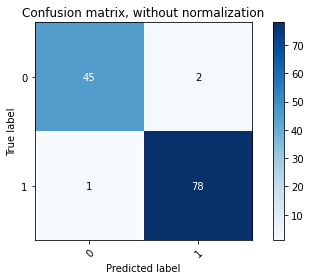

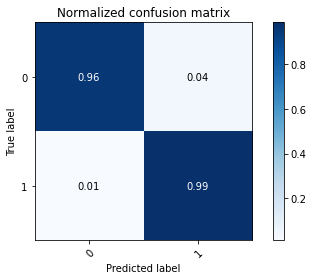

In [57]:
#Not a very satisfying confusion matrix
#Here's some code modified from 
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-
#auto-examples-model-selection-plot-confusion-matrix-py

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, predictions)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predictions, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [58]:
#So it got 45 malignant cases correct;  It had 2 false positive (predicted malignant when actually benign)
#2 false negative (predicted benign when actually malignant - this is a huge problem)
#got 77 benign cases right

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        79

    accuracy                           0.98       126
   macro avg       0.98      0.97      0.97       126
weighted avg       0.98      0.98      0.98       126



# Repeat using k-folds validation

In [60]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=7, shuffle=True)
kf

KFold(n_splits=5, random_state=7, shuffle=True)

### Showing that test splits are unique

In [61]:
for index, (train, test) in enumerate(kf.split(X), 1):
    
    print(f'Split {index}:\n')
    
    print(test)
    print('\n')

Split 1:

[  3  10  13  22  23  25  30  32  38  50  51  52  53  55  60  65  70  82
  89  97  99 101 109 115 132 146 154 155 162 170 172 179 187 188 191 192
 193 200 204 213 220 221 229 235 240 242 244 258 259 261 267 273 275 277
 283 284 292 294 311 316 318 319 326 330 333 334 336 337 342 350 354 358
 360 367 377 378 388 390 394 404 417 425 438 439 445 446 452 454 459 480
 485 492 498 501 503 508 511 514 516 520 521 523 524 528 530 531 536 542
 546 548 549 551 556 562]


Split 2:

[  0   2   4  14  20  26  28  31  40  41  46  56  57  58  59  62  66  71
  74  79  80  86  90  98 108 113 114 118 120 138 140 145 147 148 150 159
 164 165 168 173 174 202 216 217 222 228 232 236 243 245 248 249 263 264
 270 271 278 280 281 289 291 295 300 301 303 306 313 324 327 340 344 347
 353 362 370 375 380 384 386 395 406 407 408 412 416 419 422 423 424 429
 430 431 436 449 451 453 455 458 464 465 466 473 506 510 513 517 518 532
 543 558 559 561 566 567]


Split 3:

[ 15  16  18  24  34  36  37  61  69  

### Use the data to get results with 5 different sample and 5 different models

In [62]:
for index, (train, test) in enumerate(kf.split(X), 1):
    
    print(f'Split {index}:\n')
    
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=2000)
    mlp.fit(X_train,y_train)
    predictions = mlp.predict(X_test)
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    
    print('\n')

Split 1:

[[40  0]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



Split 2:

[[31  2]
 [ 1 80]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.98      0.99      0.98        81

    accuracy                           0.97       114
   macro avg       0.97      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Split 3:

[[44  2]
 [ 2 66]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.97      0.97      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.96    

### Just to show off a little, we use Google's Tensorflow (with Keras) to make a similar neural network to MLP from Scikit-Learn

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping

In [63]:
def get_new_keras_model():
    nn = Sequential()

    nn.add(Dense(30, input_shape=(X_train.shape[1],), activation='relu'))
    nn.add(Dense(30, activation='relu'))
    nn.add(Dense(30, activation='relu'))
    nn.add(Dense(1, activation='sigmoid'))

    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return nn

In [64]:
for index, (train, test) in enumerate(kf.split(X), 1):
    
    print(f'Split {index}:\n')
    
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    nn = get_new_keras_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    nn.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=False, callbacks=[early_stopping])
    
    y_pred = np.round(nn.predict(X_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print('\n')

Split 1:

[[39  1]
 [ 1 73]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Split 2:

[[31  2]
 [ 0 81]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.98      1.00      0.99        81

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



Split 3:

[[45  1]
 [ 1 67]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.99      0.99      0.99        68

    accuracy                           0.98       114
   macro avg       0.98      0.98    